# **1. Download data**

### **Step 1**

Upload the kaggle.json files (that is downloaded from Kaggle → Account → API, select Create New Token)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kyminhvinhnguyen","key":"19a61cc99701ce1941eafc4ff40d23ef"}'}

### **Step 2**
Create a kaggle directory and store your kaggle.json file inside it.

The code below will remove any existing ~/.kaggle directory and create a new one. It will also move your kaggle.json to ~/.kaggle

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### **Step 3**

Download the dataset. Copy the API Command of any Dataset and Paste it here, attaching '!' at the beginning of the API Command



In [ ]:
!kaggle datasets download -d kapilverma/uk-energy-trading

uk-energy-trading.zip: Skipping, found more recently modified local copy (use --force to force download)


### **Step 4**

The files downloaded in step 3 would be a .zip file. Hence you need to unzip it using following

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("uk-energy-trading.zip", "r")
zip_ref.extractall('/content')
zip_ref.close()

# **2. Data preprocessing**

### **2.1. Read the data**

In [ ]:
import pandas as pd
import numpy as np

# The separator for these csv files is not the default comma (,),
# but rather the semicolon (;)
auction_data_df = pd.read_csv("auction_data.csv", sep = ";")
forecast_inputs_df = pd.read_csv("forecast_inputs.csv", sep = ";")
system_prices_df = pd.read_csv("system_prices.csv", sep = ";")

In [ ]:
auction_data_df.head(10)

,Date (WET),price_first_auction,price_second_auction,traded_volume_first_auction,traded_volume_second_auction,price_forecast_first_auction
0,NaN,GBP/MWh,GBP/MWh,MW,MW,GBP/MWh
1,[01/01/2021 00:00],68,65.73,2923.7,5102.4,54.19
2,[01/01/2021 01:00],62.7,64.96,2825,4771.5,53.42
3,[01/01/2021 02:00],56,60.47,2611.4,4176.2,50.13
4,[01/01/2021 03:00],50.1,52.5,2669.3,3755.9,50.28
5,[01/01/2021 04:00],50,48.98,2741.4,4047.5,47.19
6,[01/01/2021 05:00],48,48.95,2791.1,4172.7,42.15
7,[01/01/2021 06:00],50,48.96,2817.8,3977.3,51.04
8,[01/01/2021 07:00],40,52.02,3938.3,9598.4,38.79
9,[01/01/2021 08:00],45.9,51.05,3854.2,8562.6,44.03


In [ ]:
forecast_inputs_df.head(10)

,Date (WET),demand_plus_system_margin,demand,within_day_availability,margin,within_day_margin,long_term_wind,long_term_solar,long_term_wind_over_demand,long_term_wind_over_margin,long_term_solar_over_demand,long_term_solar_over_margin,margin_over_demand,snsp_forecast,stack_price,within_day_potential_stack_price,previous_day_ahead_price,previous_continuous_half_hour_vwap,inertia_forecast
0,NaN,MW,MW,MW,MW,MW,GBP/MWh,MW,%,%,%,%,%,%,GBP/MWh,GBP/MWh,GBP/MWh,GBP/MWh,GVA.s
1,[01/01/2021 00:00],56513.64,30182,40389.06,-26331.64,-15268.7,-3674.64,0,-12,-14,0,0,-87,29.95,67.79,68.88,65.02,59.69,214.67
2,[01/01/2021 01:00],56506.94,29269,40389.06,-27237.94,-16191,-3667.94,0,-13,-14,0,0,-93,31.05,67.79,68.45,62,51.86,205.47
3,[01/01/2021 02:00],56502.2,27245,40389.06,-29257.2,-18226.26,-3663.2,0,-14,-13,0,0,-108,32.8,67.73,67.79,54.16,46.29,191.12
4,[01/01/2021 03:00],56487.24,25545.5,40389.06,-30941.74,-19935.3,-3648.24,0,-15,-12,0,0,-121,34.95,67.61,67.73,51.94,54.22,176.23
5,[01/01/2021 04:00],56373.63,24180,40389.06,-32193.63,-21212.69,-3534.63,0,-15,-11,0,0,-134,36.7,66.48,67.67,49.17,57.26,163.59
6,[01/01/2021 05:00],56247.17,24396.5,40389.06,-31850.67,-20893.73,-3408.17,0,-14,-11,0,0,-131,35.9,66.67,67.67,50.07,56.57,166.91
7,[01/01/2021 06:00],56114.37,25267.5,40389.06,-30846.87,-19877.43,-3275.37,0,-13,-11,0,0,-122,34.6,67.59,67.79,54.59,60.09,172.7
8,[01/01/2021 07:00],56114.82,26175,40389.06,-29939.82,-18945.88,-3275.82,0,-13,-11,0,0,-115,33.2,67.67,67.79,50.07,49.27,182.07
9,[01/01/2021 08:00],56139.97,27364,40389.06,-28775.97,-17831.53,-3300.97,-72.5,-12,-12,0,0,-105,31.75,67.73,67.79,58.93,49.61,193.95


In [ ]:
system_prices_df.head(10)

,Date (WET),forecast_system_price_low,forecast_system_price_high,system_price
0,NaN,GBP/MWh,GBP/MWh,GBP/MWh
1,[01/01/2021 00:00],48.33,44.89,73.15
2,[01/01/2021 01:00],54.35,53.26,71.95
3,[01/01/2021 02:00],32.66,65.86,54.56
4,[01/01/2021 03:00],41.55,63.43,70.73
5,[01/01/2021 04:00],26.62,66.91,54.98
6,[01/01/2021 05:00],17.47,64.38,39
7,[01/01/2021 06:00],25.62,67.55,43.64
8,[01/01/2021 07:00],26.96,67.24,29.01
9,[01/01/2021 08:00],46.78,47.17,17.54


Notice that the first row contain the units for the column, which we can ignore.

In [ ]:
auction_data_df = auction_data_df[1:]
forecast_inputs_df = forecast_inputs_df[1:]
system_prices_df = system_prices_df[1:]

### **2.2. Data cleaning and EDA**

#### **a. Inspecting data**

In [ ]:
auction_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14879 entries, 1 to 14879
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date (WET)                    14879 non-null  object
 1   price_first_auction           14879 non-null  object
 2   price_second_auction          14879 non-null  object
 3   traded_volume_first_auction   14879 non-null  object
 4   traded_volume_second_auction  14877 non-null  object
 5   price_forecast_first_auction  14831 non-null  object
dtypes: object(6)
memory usage: 697.6+ KB


In [ ]:
forecast_inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14879 entries, 1 to 14879
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Date (WET)                          14879 non-null  object
 1   demand_plus_system_margin           14879 non-null  object
 2   demand                              14879 non-null  object
 3   within_day_availability             14879 non-null  object
 4   margin                              14878 non-null  object
 5   within_day_margin                   14879 non-null  object
 6   long_term_wind                      14879 non-null  object
 7   long_term_solar                     14831 non-null  object
 8   long_term_wind_over_demand          14879 non-null  object
 9   long_term_wind_over_margin          14879 non-null  object
 10  long_term_solar_over_demand         14831 non-null  object
 11  long_term_solar_over_margin         14831 non-null  ob

In [ ]:
system_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14879 entries, 1 to 14879
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date (WET)                  14879 non-null  object
 1   forecast_system_price_low   14831 non-null  object
 2   forecast_system_price_high  14831 non-null  object
 3   system_price                14835 non-null  object
dtypes: object(4)
memory usage: 465.1+ KB


We can see that there's 2 main problems with the dataframes


1.   The data type of the columns are object, whereas it should be date (for `Date (WET)` column) and numeric
2.   Null values - either remove or interpolate the data



#### **b. Transform data types**

In [ ]:
import datetime as dt

# Transform the data type for the Date (WET) column into datetime and the remaining columns into numeric
# errors = "coerce" force values that can't be transform to numeric (e.g., "-", "abc") turn into NaN values
auction_data_df['Date (WET)'] = auction_data_df['Date (WET)'].apply(lambda x: (dt.datetime.strptime(x, '[%d/%m/%Y %H:%M]')))
auction_data_df[auction_data_df.columns[1:]] = auction_data_df[auction_data_df.columns[1:]].apply(lambda x: pd.to_numeric(x, errors = "coerce"))

forecast_inputs_df['Date (WET)'] = forecast_inputs_df['Date (WET)'].apply(lambda x: (dt.datetime.strptime(x, '[%d/%m/%Y %H:%M]')))
forecast_inputs_df[forecast_inputs_df.columns[1:]] = forecast_inputs_df[forecast_inputs_df.columns[1:]].apply(lambda x: pd.to_numeric(x, errors = "coerce"))

system_prices_df['Date (WET)'] = system_prices_df['Date (WET)'].apply(lambda x: (dt.datetime.strptime(x, '[%d/%m/%Y %H:%M]')))
system_prices_df[system_prices_df.columns[1:]] = system_prices_df[system_prices_df.columns[1:]].apply(lambda x: pd.to_numeric(x, errors = "coerce"))


#### **c. Handling null values**

For rows that contain null values across all columns (i.e., the entire row is null), drop them.

In [ ]:
auction_data_df = auction_data_df.dropna(how = "all")
forecast_inputs_df = forecast_inputs_df.dropna(how = "all")
system_prices_df = system_prices_df.dropna(how = "all")

Duplication check

In [ ]:
print(f"Number of duplicates for auction data: {auction_data_df.duplicated().sum()}")
print(f"Number of duplicates for forecast inputs: {forecast_inputs_df.duplicated().sum()}")
print(f"Number of duplicates for system prices: {system_prices_df.duplicated().sum()}")

Number of duplicates for auction data: 0
Number of duplicates for forecast inputs: 0
Number of duplicates for system prices: 0


There's no duplicates in the data

In [ ]:
def null_columns(df):
  null_columns_dict = {}

  for column in df.columns:
    if df[column].isnull().sum() > 0:
      null_columns_dict[column] = df[column].isnull().sum()

  return null_columns_dict

Retrieve total number of row/record for each column per table


In [ ]:
print("Auction data null columns")
for column, null_sum in null_columns(auction_data_df).items():
  print(f"{column}: {null_sum}")

print()
print("Forecast inputs null columns")
for column, null_sum in null_columns(forecast_inputs_df).items():
  print(f"{column}: {null_sum}")

print()
print("System prices null columns")
for column, null_sum in null_columns(system_prices_df).items():
  print(f"{column}: {null_sum}")

Auction data null columns
traded_volume_second_auction: 2
price_forecast_first_auction: 48

Forecast inputs null columns
demand_plus_system_margin: 1
margin: 1
long_term_solar: 49
long_term_solar_over_demand: 48
long_term_solar_over_margin: 48
margin_over_demand: 1
snsp_forecast: 48
stack_price: 1
previous_day_ahead_price: 84
previous_continuous_half_hour_vwap: 34

System prices null columns
forecast_system_price_low: 48
forecast_system_price_high: 48
system_price: 44


Get row index of the null values (take the highest 3 columns with null values)

Auction data


In [ ]:
auction_data_df[auction_data_df["traded_volume_second_auction"].isnull()].index

Int64Index([6551, 6552], dtype='int64')

In [ ]:
auction_data_df[auction_data_df["price_forecast_first_auction"].isnull()].index

Int64Index([1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547,
            1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558,
            1559, 1560, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672,
            2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683,
            2684, 2685, 2686, 2687],
           dtype='int64')

Forecast inputs

In [ ]:
forecast_inputs_df[forecast_inputs_df["previous_day_ahead_price"].isnull()].index

Int64Index([ 2089,  7274,  8952,  8976,  9000,  9024,  9048,  9072,  9096,
             9120,  9144,  9168,  9192,  9216,  9240,  9264,  9288,  9312,
             9336,  9360,  9384,  9408,  9432,  9456,  9480,  9504,  9528,
             9552,  9576,  9600,  9624,  9648,  9672,  9696,  9720,  9744,
             9768,  9792,  9816,  9840,  9864,  9888,  9912,  9936,  9960,
             9984, 10008, 10032, 10056, 10080, 10104, 10128, 10152, 10176,
            10200, 10224, 10248, 10272, 10296, 10320, 10344, 10368, 10392,
            10416, 10440, 10464, 10488, 10512, 10536, 10560, 10584, 10608,
            10632, 10656, 10680, 10704, 10728, 10752, 10776, 10800, 10825,
            10894, 13799, 13871],
           dtype='int64')

In [ ]:
forecast_inputs_df[forecast_inputs_df["long_term_solar"].isnull()].index

Int64Index([1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547,
            1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558,
            1559, 1560, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672,
            2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683,
            2684, 2685, 2686, 2687, 3172],
           dtype='int64')

In [ ]:
forecast_inputs_df[forecast_inputs_df["long_term_solar_over_demand"].isnull()].index

Int64Index([1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547,
            1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558,
            1559, 1560, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672,
            2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683,
            2684, 2685, 2686, 2687],
           dtype='int64')

System prices

In [ ]:
system_prices_df[system_prices_df["forecast_system_price_low"].isnull()].index

Int64Index([1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547,
            1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558,
            1559, 1560, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672,
            2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683,
            2684, 2685, 2686, 2687],
           dtype='int64')

In [ ]:
system_prices_df[system_prices_df["forecast_system_price_high"].isnull()].index

Int64Index([1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547,
            1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558,
            1559, 1560, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672,
            2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683,
            2684, 2685, 2686, 2687],
           dtype='int64')

In [ ]:
system_prices_df[system_prices_df["system_price"].isnull()].index

Int64Index([  601,   602,   603,   604,   605,   606,   607,   608,   609,
              610,   611,   612,   613,   614,   615,   616,   617,   618,
              619,   620,   621,   622,   623,   659,   660,   661,   662,
              663,   664,   665,   666,   667,   668,   669,   670,   671,
            12381, 14873, 14874, 14875, 14876, 14877, 14878, 14879],
           dtype='int64')

Notice that the row with null values are continuous, which we cannot simply remove as they are significant. Moreover, we can see that the range fo the missing values is around 20-30 consecutive values. Therefore, we need to find the best method to interpolate the values.

**Interpolation techniques**

Take the non-null non-null data, split  a percentage of that (similar to the 25-30 missing values range) and "mask" or hide the variable you wish to interpolate in this split.

In [ ]:
auction_data_interpolated_df1 = pd.DataFrame(columns = ["complete_value", "missing_value"])
auction_data_interpolated_df1["complete_value"] = auction_data_df["price_forecast_first_auction"][:1500]
auction_data_interpolated_df1["missing_value"] = auction_data_df["price_forecast_first_auction"][:1210]   # First complete portion
auction_data_interpolated_df1["missing_value"][1230:] = auction_data_df["price_forecast_first_auction"][1230:1500]   # Second complete portion

In [ ]:
auction_data_interpolated_df2 = pd.DataFrame(columns = ["complete_value", "missing_value"])
auction_data_interpolated_df2["complete_value"] = auction_data_df["price_forecast_first_auction"][1600:2600]
auction_data_interpolated_df2["missing_value"] = auction_data_df["price_forecast_first_auction"][1600:1920]   # First complete portion
auction_data_interpolated_df2["missing_value"][(1936 - 1600):] = auction_data_df["price_forecast_first_auction"][1936:2600]   # Second complete portion

In [ ]:
auction_data_interpolated_df3 = pd.DataFrame(columns = ["complete_value", "missing_value"])
auction_data_interpolated_df3["complete_value"] = auction_data_df["price_forecast_first_auction"][3000:10000]
auction_data_interpolated_df3["missing_value"] = auction_data_df["price_forecast_first_auction"][3000:5550]   # First complete portion
auction_data_interpolated_df3["missing_value"][(5572 - 3000):(8450 - 3000)] = auction_data_df["price_forecast_first_auction"][5572:8450]   # Second complete portion
auction_data_interpolated_df3["missing_value"][(8474 - 3000):(10000 - 3000)] = auction_data_df["price_forecast_first_auction"][8474:10000]   # Third complete portion

Now, we can try different techniques such as *rolling mean*, *rolling median*, and *spline interpolation* to interpolate the data. Then, we will test it out with RSME to determine the best interpolating method.



In [ ]:
from sklearn import metrics

def interpolation_techniques(interpolated_df):
    # For rolling window, the window size must be greater than the range of the largest gap of consecutive NaN values
    # because the window includes the value of NaN itself (which is not counted in the average) and the other NaN values
    # are not used for the averages. We'll use 25 - the largest size gap, as the value closest to the size gap result in lowest
    # RSME for rolling mean and median
    interpolated_df = interpolated_df.assign(Rollavg = interpolated_df.missing_value.fillna(interpolated_df.missing_value.rolling(25,min_periods=1,).mean()))
    interpolated_df = interpolated_df.assign(RollMedian = interpolated_df.missing_value.fillna(interpolated_df.missing_value.rolling(25,min_periods=1,).median()))
    interpolated_df = interpolated_df.assign(InterpolateSpline3 = interpolated_df.missing_value.interpolate(method='spline', order=3))
    interpolated_df = interpolated_df.assign(InterpolateSpline4 = interpolated_df.missing_value.interpolate(method='spline', order=4))
    interpolated_df = interpolated_df.assign(InterpolateSpline5 = interpolated_df.missing_value.interpolate(method='spline', order=5))

    results = [(method, np.sqrt(metrics.mean_squared_error(interpolated_df.complete_value, interpolated_df[method]))) for method in list(interpolated_df)[2:]]
    results_df = pd.DataFrame(np.array(results), columns=['Method', 'RMSE'])
    results_df["RMSE"] = results_df["RMSE"].apply(lambda x: pd.to_numeric(x, errors = "coerce"))
    results_df.sort_values(by=["RMSE"], ascending=True)
    return results_df

In [ ]:
results_df1 = interpolation_techniques(auction_data_interpolated_df1)
results_df1

,Method,RMSE
0,Rollavg,3.387168
1,RollMedian,3.607911
2,InterpolateSpline3,3.685496
3,InterpolateSpline4,17.636342
4,InterpolateSpline5,21.602988


In [ ]:
results_df2 = interpolation_techniques(auction_data_interpolated_df2)
results_df2

,Method,RMSE
0,Rollavg,1.789459
1,RollMedian,0.768336
2,InterpolateSpline3,3.645830
3,InterpolateSpline4,18.882916
4,InterpolateSpline5,37.640554


In [ ]:
results_df3 = interpolation_techniques(auction_data_interpolated_df3)
results_df3

,Method,RMSE
0,Rollavg,4.856692
1,RollMedian,4.557085
2,InterpolateSpline3,4.873641
3,InterpolateSpline4,12.762869
4,InterpolateSpline5,11.610039


We can see, from our 3 test dataframes, the rolling median has the lowest RSME (one could argue rolling average also works as effectively). Therefore, we can use the method to fill out the missing values.

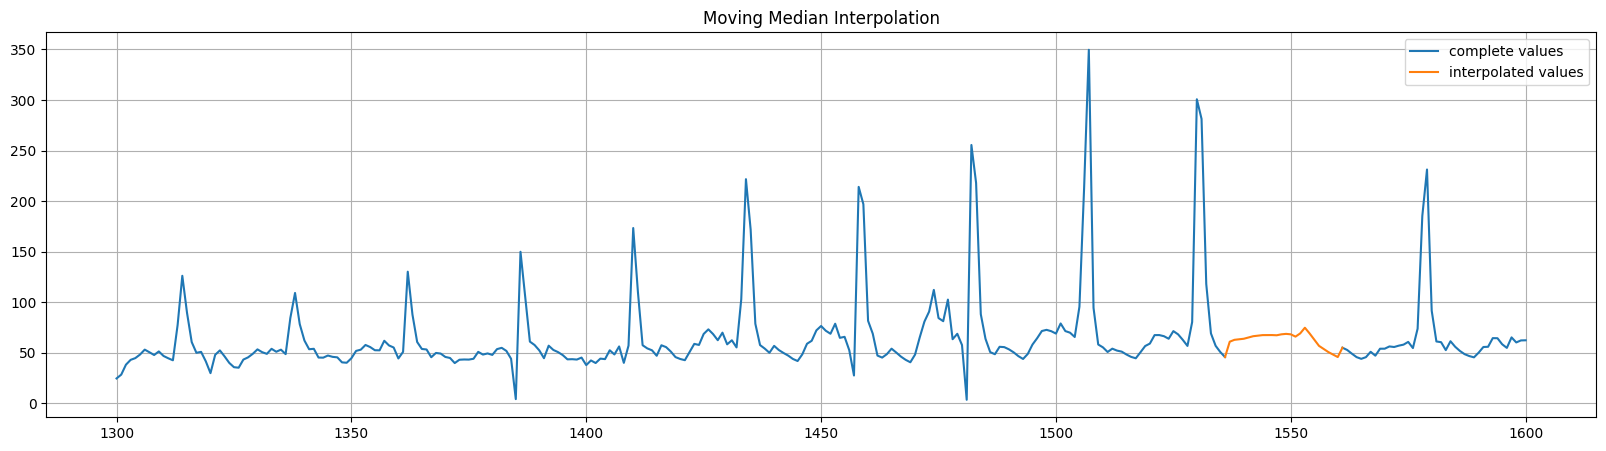

In [ ]:
import matplotlib.pyplot as plt

y_pred = auction_data_df.copy()
y_pred['price_forecast_first_auction'] = auction_data_df.price_forecast_first_auction.fillna(
    auction_data_df.price_forecast_first_auction.rolling(25,min_periods=1,).median())

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(auction_data_df['price_forecast_first_auction'].loc[1300:1600], label='complete values')
plt.plot(y_pred['price_forecast_first_auction'].loc[1536:1561], label='interpolated values')
plt.legend(loc='best')
plt.title('Moving Median Interpolation');

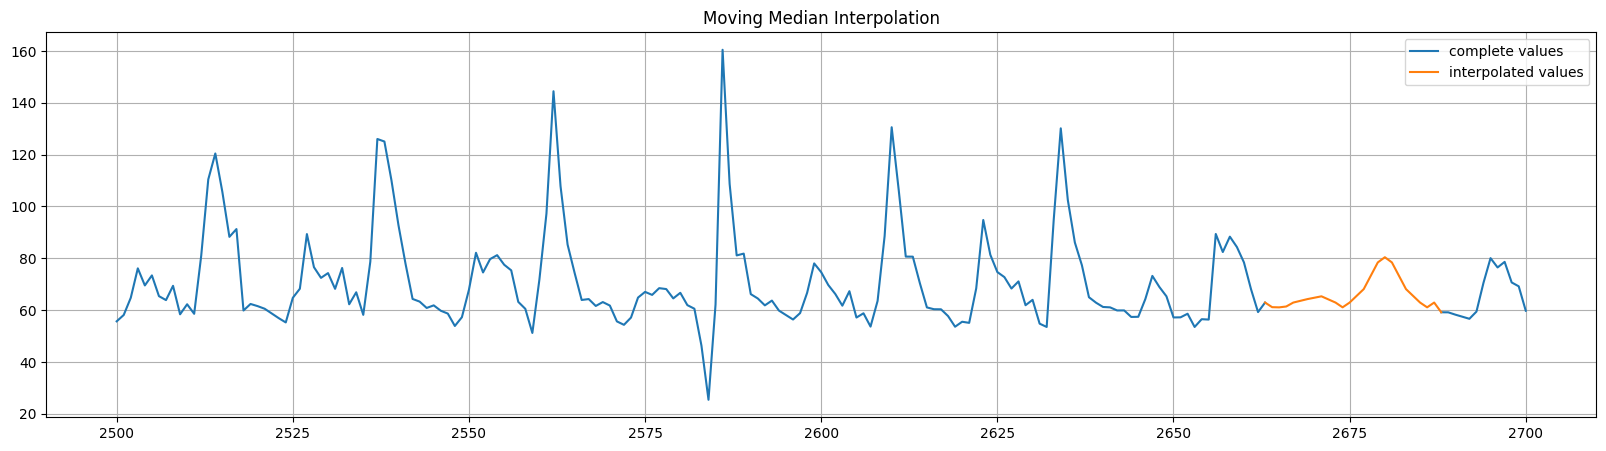

In [ ]:
y_pred = auction_data_df.copy()
y_pred['price_forecast_first_auction'] = auction_data_df.price_forecast_first_auction.fillna(
    auction_data_df.price_forecast_first_auction.rolling(25,min_periods=1,).median())

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(auction_data_df['price_forecast_first_auction'].loc[2500:2700], label='complete values')
plt.plot(y_pred['price_forecast_first_auction'].loc[2663:2688], label='interpolated values')
plt.legend(loc='best')
plt.title('Moving Median Interpolation');

Now, let's interpolate the data

In [ ]:
auction_data_df.price_forecast_first_auction = auction_data_df.price_forecast_first_auction.fillna(
                                      auction_data_df.price_forecast_first_auction.rolling(25,min_periods=1,).mean())
auction_data_df.traded_volume_second_auction = auction_data_df.traded_volume_second_auction.fillna(
                                      auction_data_df.traded_volume_second_auction.rolling(5,min_periods=1,).mean())

Repeat the process for the `forecast_inputs_df` and `system_prices_df`, but we need to create a function to handle multiple columns with missing values.


In [ ]:
def optimal_interpolation_method(df, pred_index, start_index, end_index):
    interpolation_methods = {}
    miss_val_cols = [i for i in null_columns(df) if null_columns(df)[i] > 10]   # Select column with more than 10 null values
    for col_name in miss_val_cols:
        interpolated_df = pd.DataFrame(columns=['complete_value','missing_value'])
        interpolated_df['complete_value'] = df[col_name][start_index:end_index]
        interpolated_df['missing_value'] = df[col_name][start_index:pred_index]
        results_df = interpolation_techniques(interpolated_df)
        interpolation_methods[col_name] = results_df.loc[results_df['RMSE'].idxmin()]['Method']   # Select method with lowest RMSE
    return interpolation_methods

In [ ]:
result_dict = optimal_interpolation_method(forecast_inputs_df, 1476, 500, 1500)
for col, method in result_dict.items():
  print(f"{col}: {method}")

for col in forecast_inputs_df.loc[:, forecast_inputs_df.columns != 'Date (WET)'].columns:
    if col not in result_dict or result_dict[col] == "Rollavg":
      forecast_inputs_df[col] = forecast_inputs_df[col].fillna(forecast_inputs_df[col].rolling(25,min_periods=1,).mean())
    else:
      forecast_inputs_df[col] = forecast_inputs_df[col].fillna(forecast_inputs_df[col].rolling(25,min_periods=1,).median())

null_columns(forecast_inputs_df)

long_term_solar: Rollavg
long_term_solar_over_demand: Rollavg
long_term_solar_over_margin: Rollavg
snsp_forecast: RollMedian
previous_day_ahead_price: Rollavg
previous_continuous_half_hour_vwap: RollMedian


{}

The empty dictionary indicate that there's no columns with null values

In [ ]:
result_dict = optimal_interpolation_method(system_prices_df, 3976, 3000, 4000)
for col, method in result_dict.items():
  print(f"{col}: {method}")

for col in system_prices_df.loc[:, system_prices_df.columns != 'Date (WET)'].columns:
    if col not in result_dict or result_dict[col] == "Rollavg":
      system_prices_df[col] = system_prices_df[col].fillna(system_prices_df[col].rolling(25,min_periods=1,).mean())
    else:
      system_prices_df[col] = system_prices_df[col].fillna(system_prices_df[col].rolling(25,min_periods=1,).median())

null_columns(system_prices_df)

forecast_system_price_low: RollMedian
forecast_system_price_high: Rollavg
system_price: RollMedian


{}

Now, let's download the dataframe as .csv files

In [ ]:
auction_data_df.to_csv("auction_data_df_(na_filled).csv", index=False, header=True)
forecast_inputs_df.to_csv("forecast_inputs_df_(na_filled).csv", index=False, header=True)
system_prices_df.to_csv("system_prices_df_(na_filled).csv", index=False, header=True)